
# Linear Programming Lab

## Total: 40 points

In this lab, you will explore a useful extension of linear programming duality (covered in class
LP Day 1) called linear programming sensitivity analysis. Here, we aim to find:

- How does the solution change when the objective function changes?
- How does the solution change when the resource limits change?
- How does the solution change when a constraint is added to the problem?

One approach to these types of questions is solving lots of slightly different linear programming problems. This method would work, but it is inelegant and (for large problems) computationally expensive (but in most cases today, computation is cheap and computing solutions to many problems is a standard technique to study sensitivity in practice). However, there is a more elegant solution
that gives these answers just by examining the dual information provided by the Simplex Algorithm.

**Consider the following scenario:** An instrument company makes trombones and trumpets. A trombone requires 40 square inches of metal sheet and a trumpet requires 30 square inches of metal. Metal costs $1 per square inch and 40,000 square inches are available. It takes two hours of skilled labor to make a novice quality trombone or a novice quality trumpet. Three more hours of skilled labor will turn a novice quality trombone into a professional trombone. Two more hours of skilled labor will turn a novice quality trumpet into a professional trumpet. There are 6000 hours of skilled labor available. Assume that you do not need to pay for labor. Assume that you can sell fractional trombones and trumpets. The market selling prices and production costs are given in the following table:

| Product    | Market Price | Cost (metal $1/sq.in.) |
| -------- | ------- | ------- |
| Novice Trombone | $70 | $40 |
| Professional Trombone | $140 | $40 |
| Novice Trumpet | $60 | $30 |
| Professional Trumpet | $110 | $30 |

---


# Problem 1: Formulate the LP (5 points)
## 1a: Set up the LP (3 points)

Write an objective function that maximizes profits (market price - production
costs) and all constraints.

### Instructions
- Write the equations, using LaTeX, between the $$ tags. Then convert the LP problem into code by referring to this documentation: [PuLP Guide](https://realpython.com/linear-programming-python/#using-pulp)

### Solution:
Objective Function: $$ Z =  30B_n + 100B_p + 30P_n + 80P_p $$
Constraints:
- Metal usage constraint: $$ 40(B_n + B_p) + 30(P_n + P_p) \leq 40000 $$
- Labor usage constraint: $$ 2B_n + 2P_n + 5B_p + 4P_p \leq 6000 $$
- Non-negativity constraint: $$ B_n, B_p, P_n, P_p \geq 0 $$

In [ ]:
from pulp import LpMaximize, LpProblem, LpVariable, LpStatus, PULP_CBC_CMD
import copy

# Define the problem
main_model = LpProblem(name="instrument-production", sense=LpMaximize) # (please do not rename this variable as it's used later in the notebook)

# Define variables
x1 = LpVariable(name="x1", lowBound=0)  # Novice Trombone
x2 = LpVariable(name="x2", lowBound=0)  # Professional Trombone
x3 = LpVariable(name="x3", lowBound=0)  # Novice Trumpet
x4 = LpVariable(name="x4", lowBound=0)  # Professional Trumpet

# Objective function
main_model += 30*x1 + 100*x2 + 30*x3 + 80*x4

# Constraints
# 1. Total metal sheet used
main_model += (40*(x1 + x2) + 30*(x3 + x4) <= 40000, "Metal_Sheet_Constraint")

# 2. Total skilled labor hours used
main_model += (2*x1 + 5*x2 + 2*x3 + 4*x4 <= 6000, "labor constraint")

# 3. Non-negativity constraints (already enforced by lowBound=0 in variable definition)
main_model

instrument-production:
MAXIMIZE
30*x1 + 100*x2 + 30*x3 + 80*x4 + 0
SUBJECT TO
Metal_Sheet_Constraint: 40 x1 + 40 x2 + 30 x3 + 30 x4 <= 40000

labor_constraint: 2 x1 + 5 x2 + 2 x3 + 5 x4 <= 6000

VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous
x4 Continuous

## 1b) Solve the LP Computationally (1 point)
Use the model we created above to find the optimal profit. Run the code block below to solve the problem.

### Solution:

Optimal Profit: $106666.67

In [2]:
# Solve the problem
main_model.solve()

1

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/amit/.pyenv/versions/3.12.8/envs/advalgo/lib/python3.12/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/0d41df8561c242daa83fc6bd53b56ee2-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/0d41df8561c242daa83fc6bd53b56ee2-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 20 RHS
At line 23 BOUNDS
At line 24 ENDATA
Problem MODEL has 2 rows, 4 columns and 8 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 4 (0) columns and 8 (0) elements
0  Obj -0 Dual inf 250 (4)
0  Obj -0 Dual inf 250 (4)
2  Obj 104000
Optimal - objective value 104000
Optimal objective 104000 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00



## 1c.) What is the optimal number of each instrument to produce? (1 point)
Run the code cell below to find the optimal value for each variable in the model. Fill in the table below.
### Solution:

| Variable    | Value |
| -------- | ------- |
| x1 | 0 |
| x2 | 0 |
| x3 | 0 |
| x4 | 1333.333 |

In [3]:
for var in main_model.variables():
    print(var.name, var.value())

x1 0.0
x2 400.0
x3 0.0
x4 800.0


# Problem 2: Sensitivity of Novice Quality Trumpets (5 points)

## 2a) (2 points)

What would happen if the market price of novice quality trumpets went up? In other words, how much can the market price coefficient in the objective function change without causing the optimal basis to change? This is also called “allowable increase.” You are provided a helper function to find the allowable increase. Try messing with the parameters and looking at the source code in the `helpers.py` file to understand how it works.

### Solution:

---analysis here---

In [42]:
from helpers import find_allowable_increase
# Run the helper to find the allowable increase for x3
allowable_increase = find_allowable_increase(base_model=main_model, var_name="x3", base_coef=60, step=5)

print(f"The allowable increase for x3 is: {allowable_increase}")

Iteration 1: Coefficient of x3: 60, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 2: Coefficient of x3: 65, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 3: Coefficient of x3: 70, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 4: Coefficient of x3: 75, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 5: Coefficient of x3: 80, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 6: Coefficient of x3: 85, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
---------------------------------------

/home/amit/.pyenv/versions/3.12.8/envs/advalgo/lib/python3.12/site-packages/pulp/pulp.py:1650: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


## 2b) (2 points)
Would novice trumpets be more profitable than professional trumpets to produce if novice trumpets sold for the same amount as professional quality trumpets?

### Solution:
They'd be equivalent; in this case, the limiting factor is the metal, and as they each use the same amount of metal, if the price is also equal then there would be no distinction in profit.

## 2c) (1 point)
What would change if the price went down?

### Solution:
If the price of novice trumpets went down, then the professional trumpet would once again be the most efficient product, however if they both fell far enough eventually the trumpet would take over as most profitable

# Problem 3: Sensitivity of Novice Quality Trombones (5 points)

## 3a) (2 points)

What would happen if the market price of novice quality trombones went up? In other words, what is the “allowable increase” in the market price of novice quality trombones?


### Solution:
The price of novice trombones could rise by 77 dollars before it begins to affect the optimal product line-up 

In [43]:
from helpers import find_allowable_increase

# setting verbose to False since we take smaller steps for this variable and don't want to print every iteration
allowable_increase = find_allowable_increase(base_model=main_model, var_name="x1", base_coef=70, step=1, max_iter=100, verbose=True)

print(f"The allowable increase for x1 is: {allowable_increase}")

Iteration 1: Coefficient of x1: 70, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 2: Coefficient of x1: 71, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 3: Coefficient of x1: 72, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 4: Coefficient of x1: 73, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 5: Coefficient of x1: 74, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 6: Coefficient of x1: 75, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
---------------------------------------

## 3b) (3 points)
Would they be profitable to produce if they sold for the same amount as professional quality trombones? What would make them profitable to produce (intuitive explanation is expected, not specific numbers)?

### Solution:

If they sold for the same price as professional trombones, they would not be profitable. Due to the metal constraint, 1000 trombones (either novice or professional) could be produce. At the professional price, that would be 100 in profit per trombone * 1000 units = 100,000 in profit, while the trumpet sales could make over 106,000

# Problem 4: Sensitivity of Professional Quality Trumpets (2 points)

What would happen to the optimal solution if the price of professional quality trumpets fell to $100? If there is a change, what would the new production plan and optimal profit be?

Provide your analysis and corresponding code below.

### Solution:

The new optimal production plan would be 1000 professional trombones


In [44]:
low_trumpet_model = LpProblem(name="instrument-production", sense=LpMaximize)

# Define variables
x1 = LpVariable(name="x1", lowBound=0)  # Novice Trombone
x2 = LpVariable(name="x2", lowBound=0)  # Professional Trombone
x3 = LpVariable(name="x3", lowBound=0)  # Novice Trumpet
x4 = LpVariable(name="x4", lowBound=0)  # Professional Trumpet

# TODO: Re-define Objective function
low_trumpet_model += 30*x1 + 100*x2 + 30*x3 + 70*x4

# Constraints
low_trumpet_model += 40 * x1 + 40 * x2 + 30 * x3 + 30 * x4 <= 40000, "Metal Sheet Constraint"
low_trumpet_model += 2 * x1 + 5 * x2 + 2 * x3 + 4 * x4 <= 6000, "Skilled Labor Constraint"

# Solve the low_trumpet_model
low_trumpet_model.solve(PULP_CBC_CMD(msg=0))

# Display results
print("Sensitivity Analysis for Professional Quality Trumpets (Price = $100):")
print(f"Objective value (Profit): {low_trumpet_model.objective.value()}")
for var in low_trumpet_model.variables():
    print(f"{var.name}: {var.value()}")

Sensitivity Analysis for Professional Quality Trumpets (Price = $100):
Objective value (Profit): 100000.0
x1: 0.0
x2: 1000.0
x3: 0.0
x4: 0.0


# Problem 5: Sensitivity of Metal Resources (8 points)

## 5a) (4 points)
How do production plans change when metal supplies change? At which point does metal stop being a limiting resource and how do you know?

**HINT**: To find out how the production plans change when metal supplies change, you can use a **guess-and-check approach**. 

1. Start with the current RHS of the "Metal Sheet Constraint" (40,000 square inches).
2. Gradually increase or decrease the RHS (e.g., by 1,000 or 5,000 units at a time).
3. For each adjustment:
   - Re-run to solve the problem and record the production plan (values of x_1, x_2, x_3, x_4) and the total profit.
   - Compare the new solution to the original solution (at RHS = 40,000).
4. Stop increasing when you notice the production plan has stopped changing. The last RHS value before the variable values stop changing is the **RHS Tolerance Upper Bound**.
5. Stop decreasing when the model becomes infeasible. The last RHS value before the model becomes infeasible is the **RHS Tolerance Lower Bound**.

### Solution:

As metal supplies increase, because the metal is the limiting factor, it simple increases the magnitude of the current one. At 45000 in^2 of metal, metal stops being a limiting factor, which we know because we stop being able to increase our total profit and any further increase results in metal slack.

In [59]:
rhs_tol_model = copy.deepcopy(main_model)

# Print the results
print("Initial Solution:")
print(f"Total Profit: ${rhs_tol_model.objective.value():.2f}")
print("Production Plan:")
for var in rhs_tol_model.variables():
    print(f"  {var.name}: {var.varValue}")

# Check slack for each constraint
print("\nSlack Values for Constraints:")
for name, constraint in rhs_tol_model.constraints.items():
    print(f"  {name}: RHS = {constraint.constant}, slack = {constraint.slack}")

# ---------------------------------------------
# Guess-and-Check Setup
# ---------------------------------------------
# Change the RHS of the "Metal Sheet Constraint" below and re-run this block of code.
rhs_tol_model.constraints["Metal_Sheet_Constraint"].changeRHS(45000)  # TODO: Change this value

print("---------------------------------------------")
print("After Adjusting Metal Sheet Constraint:")

# Re-solve the problem
rhs_tol_model.solve(PULP_CBC_CMD(msg=0))
print(f"Model Solution Status: {LpStatus[rhs_tol_model.status]}")

# Print updated results
print(f"Total Profit: ${rhs_tol_model.objective.value():.2f}")
print("Production Plan:")
for var in rhs_tol_model.variables():
    print(f"  {var.name}: {var.varValue}")

# Check slack for each constraint
print("\nSlack Values for Constraints:")
for name, constraint in rhs_tol_model.constraints.items():
    print(f"  {name}: RHS = {constraint.constant}, slack = {constraint.slack}")

Initial Solution:
Total Profit: $106666.66
Production Plan:
  x1: 0.0
  x2: 0.0
  x3: 0.0
  x4: 1333.3333

Slack Values for Constraints:
  Metal_Sheet_Constraint: RHS = -40000, slack = -0.0
  labor_constraint: RHS = -6000, slack = 666.6666999999998
---------------------------------------------
After Adjusting Metal Sheet Constraint:
Model Solution Status: Optimal
Total Profit: $120000.00
Production Plan:
  x1: 0.0
  x2: 0.0
  x3: 0.0
  x4: 1500.0

Slack Values for Constraints:
  Metal_Sheet_Constraint: RHS = -45000, slack = -0.0
  labor_constraint: RHS = -6000, slack = -0.0


## 5b) (4 points)
**What is the shadow price of metal?**  
1. Explain the concept of a shadow price in the context of the "Metal Sheet Constraint" and how it impacts the objective function (profit).  
2. Using the shadow price, calculate how much the profit is expected to change if the metal supplies increase by 500 square inches.  
3. Solve the problem again with the increased metal supplies and verify the expected profit change and the new production plan.

Use the following formula for profit change:  
$$ \Delta profit = \Delta \text{metal supplies quantity} \cdot dual_{metal} $$

---

### HINT

1. **What is the Shadow Price?**  
   The shadow price (also called the dual value) of a constraint tells you how much the objective value (profit) will change per unit increase in the RHS of the constraint, as long as the change is within the **RHS tolerance interval**.

2. **How to Find the Shadow Price?**  
   - Solve the LP model with the original RHS.
   - Check the **dual value** (`constraint.pi`) of the "Metal Sheet Constraint" in the solver's output. This is the shadow price.

3. **Useful Methods**
   - Use `shadow_model.constraints["Metal_Sheet_Constraint"].changeRHS(new_rhs)` to update the RHS of the "Metal Sheet Constraint"

### Solution:

According to model output, the shadow price is 8/3. Therefore, by the given formula, $\Delta profit = 500 * 8/3 = 1333.33 $

In [78]:
shadow_model = copy.deepcopy(main_model)

# TODO: Solve the shadow price problem
shadow_model.solve()
print(f"DUAL: {shadow_model.constraints["Metal_Sheet_Constraint"].pi}")


# TODO: Update RHS
shadow_model.constraints["Metal_Sheet_Constraint"].changeRHS(40500)
shadow_model.solve(PULP_CBC_CMD(msg=0))

# Display the new results
print("New Results with Increased Metal Supply:")
print(f"New Profit: {shadow_model.objective.value()}")
print("Production Plan:")
for var in shadow_model.variables():
    print(f"  {var.name}: {var.value()}")

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/amit/.pyenv/versions/3.12.8/envs/advalgo/lib/python3.12/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/b9a015a2f78d45e58491af58d3606ca8-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/b9a015a2f78d45e58491af58d3606ca8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 20 RHS
At line 23 BOUNDS
At line 24 ENDATA
Problem MODEL has 2 rows, 4 columns and 8 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 4 (0) columns and 8 (0) elements
0  Obj -0 Dual inf 270 (4)
0  Obj -0 Dual inf 270 (4)
1  Obj 106666.67
Optimal - objective value 106666.67
Optimal objective 106666.6667 - 1 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

DUAL: 2.6666667
New Results with I

# Problem 6: Sensitivity of Labor Resources (5 points)

## 6a) (1 point)
How much labor is unused?

In the main model, there are ~666.667 hours of labor unused as slack

HINT: What is the slack?

In [84]:
# TODO
print("\nSlack Values for Constraints:")
for name, constraint in main_model.constraints.items():
    print(f"  {name}: RHS = {constraint.constant}, slack = {constraint.slack}")


Slack Values for Constraints:
  Metal_Sheet_Constraint: RHS = -40000, slack = -0.0
  labor_constraint: RHS = -6000, slack = 666.6666999999998


## 6b) (2 points)
How much would you be willing to pay an additional laborer?

### Solution:

0. I am currently constrained by my metal supplies, so an additional laborer would not be able to produce any more instruments.

## 6c) (2 points)
Suppose that industrial regulation complicate the process so it takes an additional hour of labor to turn a novice quality instrument into a professional quality instrument. How and why does that change affect the optimal production plan and profit?

### Solution:

We'd eventually run out of labor hours if one professional trumpet took 5 hours of labor, so we'd instead make 800 professional trumpets and 400 professional trombones for a profit of 104000

# Problem 7: Sensitivity of New Constraint (5 points)

## 7a) (4 points)
The owner of the company comes up with a design for a beautiful hand-crafted tuba. Each tuba requires 250 hours of labor (6.25 weeks of full time work) and uses 50 square inches of metal. If the
company can sell tubas for $200, would it be worthwhile to produce? Use:
$$ \text{(marginal cost of metal)}_{tuba} = \text{(metal used)}_{tuba} \cdot dual_{metal} $$

Discuss how looking at the shadow prices of metal and labor can help
you intuit whether diverting metal resources to tuba production is a good idea. Check your intuition with the solver.

### Solution:

In ths case, marginal metal cost for a tuba would be equal to $50 * 2.66 = 133$. If we can sell a tuba for 200 and make 150 in profit, then it would be worth it to make at least some tubas, especially since we have labor hours to spare

In [14]:
from pulp import LpMaximize, LpProblem, LpVariable, value

# Define the problem
tuba_model = LpProblem(name="instrument-production", sense=LpMaximize)

# Define variables
x1 = LpVariable(name="x1", lowBound=0)  # Novice Trombone
x2 = LpVariable(name="x2", lowBound=0)  # Professional Trombone
x3 = LpVariable(name="x3", lowBound=0)  # Novice Trumpet
x4 = LpVariable(name="x4", lowBound=0)  # Professional Trumpet
x5 = LpVariable(name="x5", lowBound=0)  # Tubas

# TODO: Define the problem and analyze the shadow prices
tuba_model += 30*x1 + 100*x2 + 30*x3 + 80*x4 + 150*x5

# Constraints
# 1. Total metal sheet used
tuba_model += (40*(x1 + x2) + 30*(x3 + x4) + 50*x5 <= 40000, "Metal_Sheet_Constraint")

# 2. Total skilled labor hours used
tuba_model += (2*x1 + 5*x2 + 2*x3 + 4*x4 + 250*x5 <= 6000, "labor constraint")

tuba_model.solve()
print("DUAL: ", tuba_model.constraints["Metal_Sheet_Constraint"].pi)
for var in tuba_model.variables():
    print(f"  {var.name}: {var.value()}")

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/amit/.pyenv/versions/3.12.8/envs/advalgo/lib/python3.12/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/017743e85ae742fe8f6579ad480d72e8-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/017743e85ae742fe8f6579ad480d72e8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 23 RHS
At line 26 BOUNDS
At line 27 ENDATA
Problem MODEL has 2 rows, 5 columns and 10 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 5 (0) columns and 10 (0) elements
0  Obj -0 Dual inf 949.76675 (5)
0  Obj -0 Dual inf 949.76675 (5)
2  Obj 106712.33
Optimal - objective value 106712.33
Optimal objective 106712.3288 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

DUAL:  2.6575342
  x

## 7b) (1 point)
Is it profitable if tubas sell for $150? Why?

### Solution:

If tubas sold for 150, we'd only be making 100 in profit, so if our marginal cost is 133.333, it would not make sense to produce tubas in this case.

# Problem 8: Making Sense of the Dual Problem (5 points)

## 8a) (3 points)
Set up the original problem’s corresponding dual LP. Write an objective function that maximizes profits (market price - production costs) and all dual constraints.

In [22]:
from pulp import LpMinimize, LpProblem, LpVariable

# Define the dual problem
dual_model = LpProblem(name="dual-instrument-production", sense=LpMinimize)

# Objective function
# main_model += 30*x1 + 100*x2 + 30*x3 + 80*x4

# Constraints
# 1. Total metal sheet used
# main_model += (40*(x1 + x2) + 30*(x3 + x4) <= 40000, "Metal_Sheet_Constraint")

# 2. Total skilled labor hours used
# main_model += (2*x1 + 5*x2 + 2*x3 + 4*x4 <= 6000, "labor constraint")

# TODO: Define the dual problem
y1 = LpVariable(name="y1", lowBound=0)
y2 = LpVariable(name="y2", lowBound=0)

dual_model += 40000 * y1 + 6000 * y2

dual_model += ( 30 <= 40*y1 + 2*y2, "c1")
dual_model += ( 100 <= 40*y1 + 5*y2, "c2")
dual_model += ( 30 <= 30*y1 + 2*y2, "c3")
dual_model += ( 80 <= 30*y1 + 4*y2, "c4")
dual_model

dual-instrument-production:
MINIMIZE
40000*y1 + 6000*y2 + 0
SUBJECT TO
c1: 40 y1 + 2 y2 >= 30

c2: 40 y1 + 5 y2 >= 100

c3: 30 y1 + 2 y2 >= 30

c4: 30 y1 + 4 y2 >= 80

VARIABLES
y1 Continuous
y2 Continuous

## 8b) (1 point)
Run the code block below to solve the problem. What is the optimal profit? Give a plot of the constraints (you can use this [example](https://github.com/hakeemrehman/Python-PuLP-/blob/master/LP%20Using%20PuLP%20and%20Graphical%20Sol..ipynb) for guidance).

In [25]:
# Solve the dual problem
dual_model.solve(PULP_CBC_CMD(msg=0))

# Display the results
print("Dual Problem Results:")
print(f"Optimal Value (Total Resource Value): {dual_model.objective.value()}")

Dual Problem Results:
Optimal Value (Total Resource Value): 106666.66799999999


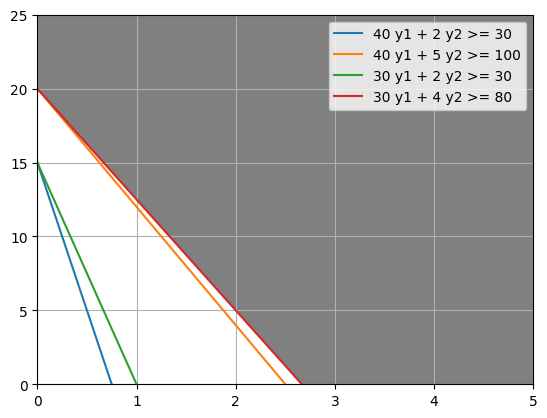

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the optimal solution
x = np.arange(0, 4)
plt.plot(x, 15 - 20*x, label = '40 y1 + 2 y2 >= 30')
plt.plot(x, 20 - 8*x, label= '40 y1 + 5 y2 >= 100')
plt.plot(x, 15 - 15*x, label = '30 y1 + 2 y2 >= 30')
plt.plot(x, 20 - 7.5*x, label='30 y1 + 4 y2 >= 80')
plt.axis([0, 5, 0, 25])

# Define the boundaries of the feasible area in the plot
x = [0, 0, 8/3, 5, 5]
y = [25, 20, 0, 0, 25]
plt.fill(x, y, 'grey')

# plt.text(0.1, 4, 'Feasible \n Region', size = '11')
# plt.annotate('Optimal \n solution\n(1.5, 1)', xy = (1.5, 1.0))

# plt.xlabel("x_1")
# plt.ylabel("x_2")
# plt.title('LPP:Graphical Solution')
# plt.axis([0, 3, 0, 6])
plt.grid(True)
plt.legend()
plt.show()

## 8c) (1 point)
Say something about the relationship between dual variables and slackness in the primal and dual problem.

### Solution:

By Corresponding Slacknes, if a variable in an LP is greater than zero, the corresponding constraint in the other LP is binding (ie, has zero slack), and vice versa (so if one constraint has some slack, the corresponding variable in the dual is zero).